In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV,LassoCV
%matplotlib inline

In [2]:
with open("dfofMoviesNEW10.pkl", 'rb') as picklefile: 
    testDataforLinear = pickle.load(picklefile)

FileNotFoundError: [Errno 2] No such file or directory: 'dfofMoviesNEW10.pkl'

In [ ]:
testDataforLinear

In [ ]:
testDataforLinear.columns = ['Movie_Title', 'Studio_x','Adjusted_Gross','No','Gross_Theatres','Opening_Dollar_Amt','Opening_Theatres','Domestic_Gross',"Rating","Release_Date","Runtime",'Actors',"Awards","Director","Genre","Production","Year","imdbRating","imdbVotes"]

In [ ]:
testDataforLinear

In [163]:
#with open('MovieDataSet.pkl', 'wb') as picklefile:
 #   pickle.dump(testDataforLinear, picklefile)
with open("MovieDataSet.pkl", 'rb') as picklefile: 
    MovieDataSet = pickle.load(picklefile)

In [ ]:
MovieDataSet

In [ ]:
MovieDataSet.Studio_x.value_counts()

In [ ]:
MovieDataSet.head()

In [168]:
data2=MovieDataSet.groupby(['imdbRating'])['imdbVotes'].sum().reset_index().sort_values(by='imdbRating',ascending=False)

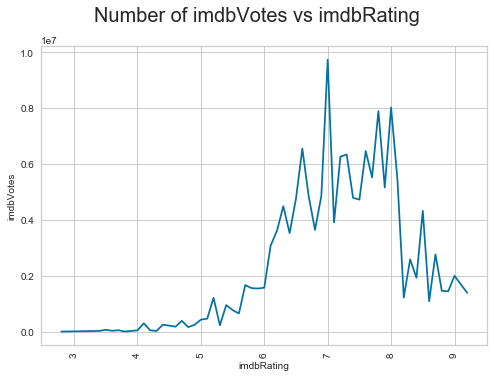

In [170]:
#plt.figure(figsize=[20, 15])
x=data2['imdbRating']
y = data2['imdbVotes']
plt.xlabel('imdbRating',fontsize=10)
plt.ylabel('imdbVotes',fontsize=10)
plt.suptitle('Number of imdbVotes vs imdbRating', fontsize=20)

plt.plot(x,y)
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

In [ ]:
MovieDataSet

In [166]:
MovieDataSettemp=MovieDataSet.groupby(['Movie_Title'])['imdbRating'].sum().reset_index().sort_values(by='imdbRating',ascending=False)

In [ ]:
MovieDataSettemp.head()

In [167]:
#plt.figure(figsize=[20, 15])
x=data3['imdbRating']
y = data3['Domestic_Gross']
plt.xlabel('imdbRating',fontsize=10)
plt.ylabel('Domestic_Gross',fontsize=10)
plt.suptitle('Domestic_Gross vs imdbRating', fontsize=20)

plt.plot(x,y)
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

NameError: name 'data3' is not defined

In [ ]:
MovieDataSet.info()

In [ ]:
MovieDataSet.corr()

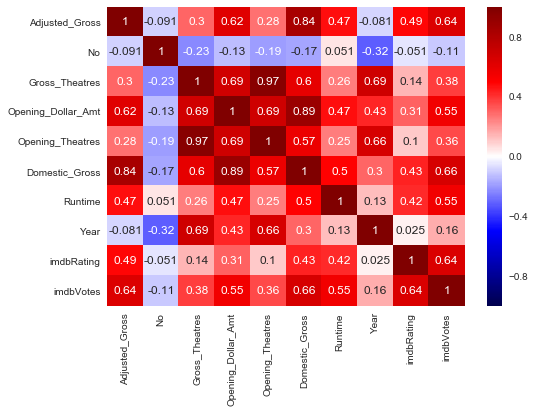

In [164]:
sns.heatmap(MovieDataSet.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

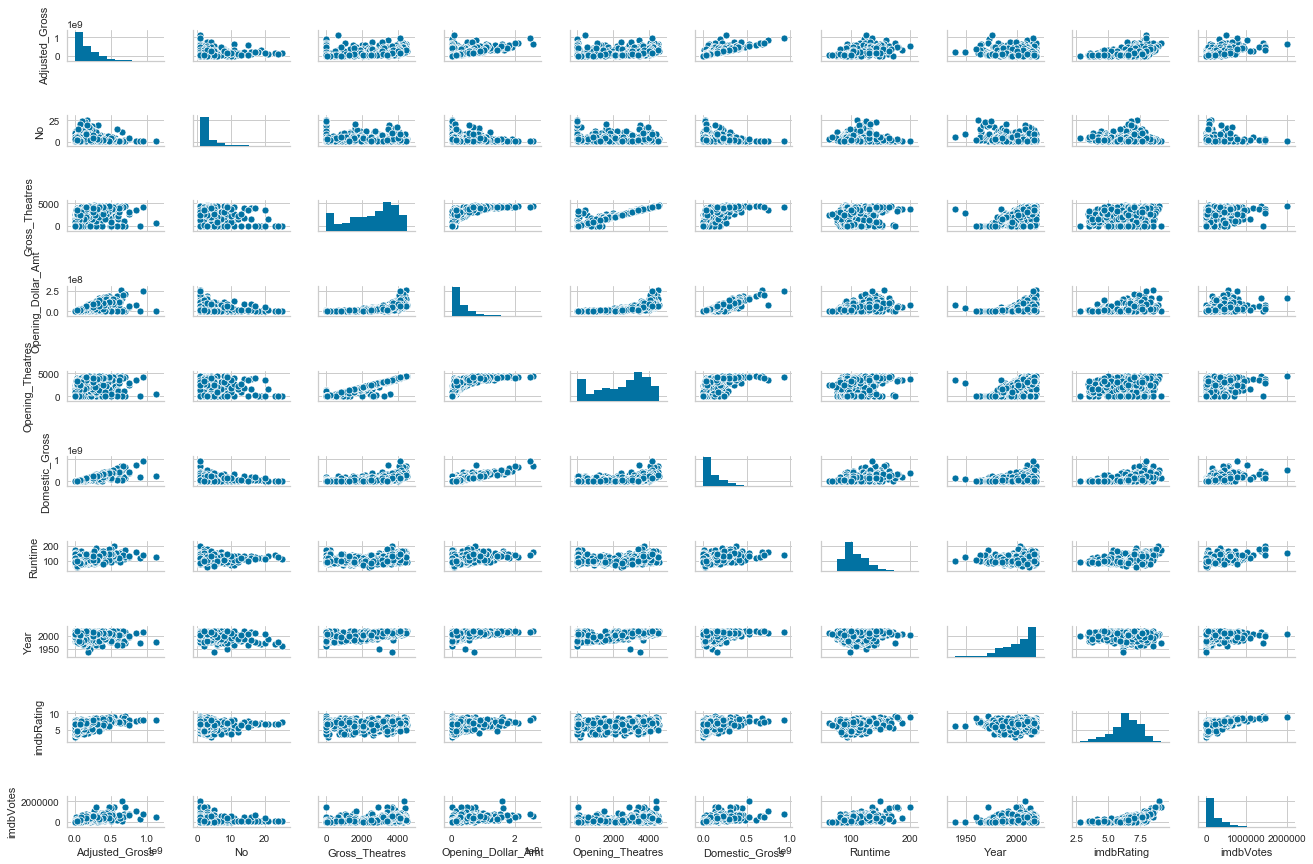

In [165]:
sns.pairplot(MovieDataSet, height=1.2, aspect=1.5);

#First using Continuous Variables

# Define the model
lm1 = smf.ols('imdbRating ~ Adjusted_Gross + Gross_Theatres+ Opening_Dollar_Amt + Domestic_Gross + Runtime + imdbVotes', data=MovieDataSet) #smf is a diff library

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

#statsmodels

#Removing the 3 highest p values from our model #gross theatres,domestic gross and opening dollar amt
#First using Continuous Variables

# Define the model
lm2 = smf.ols('imdbRating ~ Adjusted_Gross  + Opening_Theatres + Runtime + Year + imdbVotes', data=MovieDataSet) #smf is a diff library

# Fit the model
fit2 = lm2.fit()

# Print summary statistics of the model's performance
fit2.summary()

#statsmodels

#Removing the Year
#First using Continuous Variables

# Define the model
lm3 = smf.ols('imdbRating ~ Adjusted_Gross  + Opening_Theatres + Runtime + imdbVotes', data=MovieDataSet) #smf is a diff library

# Fit the model
fit3 = lm3.fit()

# Print summary statistics of the model's performance
fit3.summary()

#statsmodels

In [ ]:
MovieDataSet.Rating.value_counts()

In [ ]:
MovieDataSet["Rating"] = MovieDataSet["Rating"].str.replace("Not Yet Rated","Unrated")

In [ ]:
MovieDataSet["Rating"] = MovieDataSet["Rating"].str.replace("GP","PG")

In [ ]:
MovieDataSet["Rating"] = MovieDataSet["Rating"].str.replace("M","PG")

In [ ]:
MovieDataSet["Rating"] = MovieDataSet["Rating"].str.replace("PG/PG","PG")

In [ ]:
MovieDataSet.Rating.value_counts()

In [1]:
#with open('MovieDataSetE.pkl', 'wb') as picklefile:
 #   pickle.dump(MovieDataSet, picklefile)
with open("MovieDataSetE.pkl", 'rb') as picklefile: 
    MovieDataSetE = pickle.load(picklefile)

NameError: name 'pickle' is not defined

In [6]:
MovieDataSetE

,Movie_Title,Studio_x,Adjusted_Gross,No,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Domestic_Gross,Rating,Release_Date,Runtime,Actors,Awards,Director,Genre,Production,Year,imdbRating,imdbVotes
0,3 Ninjas,BV,61704300,1,1954,5888920,1912,29000301,PG,1992-08-07,85.0,"Victor Wong, Michael Treanor, Max Elliott Slad...",1 nomination.,Jon Turteltaub,"Action, Comedy, Family",Buena Vista Pictures,1992,5.2,18251
1,3 Ninjas Kick Back,TriS,24924400,2,2043,3556310,2038,11798854,PG,1994-05-06,94.0,"Victor Wong, Max Elliott Slade, Sean Fox, J. E...",3 nominations.,Charles T. Kanganis,"Family, Comedy, Action",Sony Pictures Home Entertainment,1994,4.4,7636
2,3 Ninjas Knuckle Up,Sony,839300,3,52,67789,52,413479,PG-13,1995-03-10,87.0,"Victor Wong, Charles Napier, Michael Treanor, ...",2 nominations.,Sang-ok Shin,"Comedy, Action, Family",Sony Pictures Home Entertainment,1995,4.2,4825
3,3 Ninjas: High Noon at Mega Mountain,Sony,707500,4,120,150127,120,375805,PG,1998-04-10,93.0,"Hulk Hogan, Loni Anderson, Jim Varney, Mathew ...",2 nominations.,Sean McNamara,"Action, Adventure, Comedy, Family",Sony Pictures Home Entertainment,1998,2.8,9662
4,300,WB,270309600,1,3280,70885301,3103,210614939,R,2007-03-09,117.0,"Gerard Butler, Lena Headey, Dominic West, Davi...",17 wins & 45 nominations.,Zack Snyder,"Action, Fantasy",Warner Bros. Pictures,2006,7.7,677971
5,Kiss the Girls,Par.,116440300,2,2406,13215167,2271,60527873,R,1997-10-03,117.0,"Morgan Freeman, Ashley Judd, Cary Elwes, Alex ...",5 nominations.,Gary Fleder,"Crime, Drama, Mystery, Thriller",Paramount Home Video,1997,6.6,57986
6,Along Came a Spider,Par.,115567200,1,2573,16712407,2530,74078174,R,2001-04-06,103.0,"Morgan Freeman, Monica Potter, Michael Wincott...",1 win & 1 nomination.,Lee Tamahori,"Drama, Thriller",Paramount Pictures,2001,6.3,67124
7,Alex Cross,LG/S,28397800,3,2541,11396768,2539,25888412,PG-13,2012-10-19,101.0,"Tyler Perry, Edward Burns, Matthew Fox, Jean Reno",4 nominations.,Rob Cohen,"Action, Crime, Mystery, Thriller",Summit,2012,5.1,30638
8,Alice Through the Looking Glass,BV,77969900,2,3763,26858726,3763,77041381,PG,2016-05-27,112.0,"Johnny Depp, Mia Wasikowska, Helena Bonham Car...",2 wins & 18 nominations.,James Bobin,"Adventure, Family, Fantasy",Walt Disney Pictures,2016,6.2,75557
9,Alien,Fox,277722500,4,757,3527881,91,78944891,R,1979-05-25,117.0,"Tom Skerritt, Sigourney Weaver, Veronica Cartw...",Won 1 Oscar. Another 16 wins & 19 nominations.,Ridley Scott,"Horror, Sci-Fi",20th Century Fox,1979,8.5,691126


In [7]:
MovieDataSetE.Production.value_counts()

Universal Pictures                          71
Paramount Pictures                          62
20th Century Fox                            60
Warner Bros. Pictures                       54
Walt Disney Pictures                        32
Sony Pictures                               28
New Line Cinema                             23
Sony Pictures Home Entertainment            18
Warner Home Video                           16
United Artists                              14
MGM                                         13
Lionsgate                                   12
Buena Vista                                 12
N/A                                         11
Lionsgate Films                             10
MGM Home Entertainment                      10
Columbia Pictures                           10
Buena Vista Pictures                         9
MCA Universal Home Video                     9
WARNER BROTHERS PICTURES                     9
Dimension Films                              8
Miramax Films

In [8]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Warner Bros. Pictures/Legendary Pictures","Warner Bros. Pictures")

In [9]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Warner Bros.","Warner Bros. Pictures")

In [10]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("WARNER BROTHERS PICTURES","Warner Bros. Pictures")

In [11]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Warner Home Video","Warner Bros. Pictures")

In [12]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Warner Home Video","Warner Bros. Pictures")

In [13]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Warner Bros. Pictures Pictures","WB")

In [14]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("WB","Warner Bros. Pictures")

In [15]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Paramount Home Video","Paramount Pictures")

In [16]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Buena Vista Pictures","Buena Vista")

In [17]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Sony","Sony Pictures")

In [18]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Paramount","Paramount Pictures")

In [19]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Paramount Pictures Studios","PM")

In [20]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Paramount Pictures Pictures","PM")

In [21]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Paramount Pictures","PM")

In [22]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("PM","Paramount Pictures")

In [23]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Sony Pictures Pictures Home Entertainment","Sony")

In [24]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Sony Pictures Pictures","Sony")

In [25]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Lionsgate Films","Lionsgate")

In [26]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("MGM Home Entertainment","MGM")

In [27]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("MGM Home Entertainment","M")

In [28]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Twentieth Century Fox Home Entertainment","20th")

In [29]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("20th Century Fox","20th")

In [30]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Lions Gate","Lionsgate")

In [31]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Sony Pictures","Sony")

In [32]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("MGM","M")

In [33]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Warner Bros. PicturesPictures","Warner Bros.")

In [34]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Sony Releasing","Sony")

In [35]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Warner Bros","WBP")

In [36]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("Warner Bros. Pictures","WBP")

In [37]:
MovieDataSetE["Production"] = MovieDataSetE["Production"].str.replace("WBP","Warner Bros")

In [38]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='MGM']

Series([], Name: Production, dtype: object)

In [39]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Walt Disney Productions']='Walt Disney Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Buena Vista Distribution Company']='Buena Vista'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Warner Bros']='Warner Bros. Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Paramount Pictures Classics']='Paramount Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Universal Studios']='Universal Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Walt Disney Home Entertainment']='Walt Disney Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Twentieth Century Fox']='20th'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Metro-Goldwyn-Mayer']='MGM'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Lionsgate Pictures']='Lionsgate'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='DreamWorks Animation']='Dreamworks'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Fox Searchlight']='Fox'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Universal Classics']='Universal Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Universal Pictures Distributio']='Universal Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Columbia Pictures / Sony Animation']='Sony'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Sony/Columbia Pictures']='Sony'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='LionsGate Entertainment']='Lionsgate'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Dreamworks']='Paramount Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Paramount Pictures/Dreamworks']='Paramount Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Sony Screen Gems']='Sony'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Sony Screen Gems']='Sony'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Sony/Screen Gems']='Sony'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Lionsgate']='Lionsgate Films'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Sony Columbia']='Sony'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Paramount Pictures/DWA']='Paramount Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Sony Entertainment']='Sony'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='DreamWorks SKG']='Paramount Pictures'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
MovieDataSetE["Production"][MovieDataSetE["Production"]=='Miramax Films ']='Miramax Films'

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
MovieDataSetE.Production.value_counts()

Paramount Pictures                95
Warner Bros. Pictures             88
Universal Pictures                77
20th                              67
Sony                              59
Walt Disney Pictures              37
Lionsgate Films                   28
M                                 23
New Line Cinema                   23
Buena Vista                       22
United Artists                    14
N/A                               11
Columbia Pictures                 10
MCA Universal Home Video           9
Dimension Films                    8
Miramax Films                      7
Focus Features                     6
TriStar Pictures                   6
Media Home Entertainment           5
Summit Entertainment               5
Open Road Films                    4
Fox                                4
IFC Films                          3
New Line Home Entertainment        3
Touchstone Pictures                3
Walt Disney Pictures/PIXAR         2
Buena Vista Distribution Compa     2
F

In [67]:
MovieDataSetE.imdbRating.max()

9.2

In [68]:
MovieDataSetF=MovieDataSetE.drop(["No"],axis=1)

In [ ]:
MovieDataSetF

In [3]:
#with open('MovieDataSetF.pkl', 'wb') as picklefile:
 #   pickle.dump(MovieDataSetF, picklefile)
with open("MovieDataSetF.pkl", 'rb') as picklefile: 
    MovieDataSetF = pickle.load(picklefile)

In [4]:
MovieDataSetF

,Movie_Title,Studio_x,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Domestic_Gross,Rating,Release_Date,Runtime,Actors,Awards,Director,Genre,Production,Year,imdbRating,imdbVotes
0,3 Ninjas,BV,61704300,1954,5888920,1912,29000301,PG,1992-08-07,85.0,"Victor Wong, Michael Treanor, Max Elliott Slad...",1 nomination.,Jon Turteltaub,"Action, Comedy, Family",Buena Vista,1992,5.2,18251
1,3 Ninjas Kick Back,TriS,24924400,2043,3556310,2038,11798854,PG,1994-05-06,94.0,"Victor Wong, Max Elliott Slade, Sean Fox, J. E...",3 nominations.,Charles T. Kanganis,"Family, Comedy, Action",Sony,1994,4.4,7636
2,3 Ninjas Knuckle Up,Sony,839300,52,67789,52,413479,PG-13,1995-03-10,87.0,"Victor Wong, Charles Napier, Michael Treanor, ...",2 nominations.,Sang-ok Shin,"Comedy, Action, Family",Sony,1995,4.2,4825
3,3 Ninjas: High Noon at Mega Mountain,Sony,707500,120,150127,120,375805,PG,1998-04-10,93.0,"Hulk Hogan, Loni Anderson, Jim Varney, Mathew ...",2 nominations.,Sean McNamara,"Action, Adventure, Comedy, Family",Sony,1998,2.8,9662
4,300,WB,270309600,3280,70885301,3103,210614939,R,2007-03-09,117.0,"Gerard Butler, Lena Headey, Dominic West, Davi...",17 wins & 45 nominations.,Zack Snyder,"Action, Fantasy",Warner Bros. Pictures,2006,7.7,677971
5,Kiss the Girls,Par.,116440300,2406,13215167,2271,60527873,R,1997-10-03,117.0,"Morgan Freeman, Ashley Judd, Cary Elwes, Alex ...",5 nominations.,Gary Fleder,"Crime, Drama, Mystery, Thriller",Paramount Pictures,1997,6.6,57986
6,Along Came a Spider,Par.,115567200,2573,16712407,2530,74078174,R,2001-04-06,103.0,"Morgan Freeman, Monica Potter, Michael Wincott...",1 win & 1 nomination.,Lee Tamahori,"Drama, Thriller",Paramount Pictures,2001,6.3,67124
7,Alex Cross,LG/S,28397800,2541,11396768,2539,25888412,PG-13,2012-10-19,101.0,"Tyler Perry, Edward Burns, Matthew Fox, Jean Reno",4 nominations.,Rob Cohen,"Action, Crime, Mystery, Thriller",Summit,2012,5.1,30638
8,Alice Through the Looking Glass,BV,77969900,3763,26858726,3763,77041381,PG,2016-05-27,112.0,"Johnny Depp, Mia Wasikowska, Helena Bonham Car...",2 wins & 18 nominations.,James Bobin,"Adventure, Family, Fantasy",Walt Disney Pictures,2016,6.2,75557
9,Alien,Fox,277722500,757,3527881,91,78944891,R,1979-05-25,117.0,"Tom Skerritt, Sigourney Weaver, Veronica Cartw...",Won 1 Oscar. Another 16 wins & 19 nominations.,Ridley Scott,"Horror, Sci-Fi",20th,1979,8.5,691126


In [7]:
MovieDataSetF.to_csv('moviedf.csv', index=False)

MovieDataSetGMovieDataSetF

In [ ]:
#REGRESSION

In [71]:
XM=patsy.dmatrix('Rating',data=MovieDataSetF,return_type='dataframe')
XM.head()

,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Rating[T.Unrated]
0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0


In [72]:
num_subset = ['imdbRating','Adjusted_Gross','Gross_Theatres',  'Opening_Dollar_Amt',  'Opening_Theatres', 'Domestic_Gross', 'Runtime', 'Year', 'imdbVotes']

In [73]:
MovieDataSet1=pd.concat([MovieDataSetF[num_subset],XM],axis=1,join_axes=[MovieDataSetF.index])

In [74]:
MovieDataSet1.describe()

,imdbRating,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Domestic_Gross,Runtime,Year,imdbVotes,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Rating[T.Unrated]
count,717.000000,7.170000e+02,717.000000,7.170000e+02,717.000000,7.170000e+02,717.000000,717.000000,7.170000e+02,717.0,717.000000,717.000000,717.000000,717.000000
mean,6.445467,1.705217e+08,2566.506276,3.243667e+07,2480.761506,1.155262e+08,108.760112,2001.882845,2.055323e+05,1.0,0.264993,0.343096,0.323570,0.008368
std,1.056476,1.593243e+08,1311.159044,3.731308e+07,1348.088577,1.178272e+08,19.601360,13.236259,2.381737e+05,0.0,0.441638,0.475075,0.468165,0.091158
min,2.800000,7.000000e+02,0.000000,0.000000e+00,0.000000,7.420000e+02,63.000000,1939.000000,3.600000e+02,1.0,0.000000,0.000000,0.000000,0.000000
25%,5.800000,5.580300e+07,1613.000000,7.061513e+06,1448.000000,3.171506e+07,94.000000,1992.000000,3.988600e+04,1.0,0.000000,0.000000,0.000000,0.000000
50%,6.500000,1.188310e+08,2899.000000,1.999154e+07,2849.000000,7.598650e+07,104.000000,2005.000000,1.256880e+05,1.0,0.000000,0.000000,0.000000,0.000000
75%,7.200000,2.483139e+08,3633.000000,4.478377e+07,3587.000000,1.652491e+08,120.000000,2013.000000,2.918040e+05,1.0,1.000000,1.000000,1.000000,0.000000
max,9.200000,1.130936e+09,4535.000000,2.576982e+08,4529.000000,9.366622e+08,200.000000,2018.000000,2.005606e+06,1.0,1.000000,1.000000,1.000000,1.000000


In [75]:
#with open('MovieDataSet1.pkl', 'wb') as picklefile:
 #   pickle.dump(MovieDataSet1, picklefile)
with open("MovieDataSet1.pkl", 'rb') as picklefile: 
    MovieDataSet2 = pickle.load(picklefile)

In [76]:
#df.drop(columns=['B', 'C'])

In [77]:
MovieDataSet4=MovieDataSet2.drop(columns=['Domestic_Gross'])

In [78]:
MovieDataSet4.head()

,imdbRating,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Runtime,Year,imdbVotes,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Rating[T.Unrated]
0,5.2,61704300,1954,5888920,1912,85.0,1992,18251,1.0,1.0,0.0,0.0,0.0
1,4.4,24924400,2043,3556310,2038,94.0,1994,7636,1.0,1.0,0.0,0.0,0.0
2,4.2,839300,52,67789,52,87.0,1995,4825,1.0,0.0,1.0,0.0,0.0
3,2.8,707500,120,150127,120,93.0,1998,9662,1.0,1.0,0.0,0.0,0.0
4,7.7,270309600,3280,70885301,3103,117.0,2006,677971,1.0,0.0,0.0,1.0,0.0


In [4]:
#with open('MovieDataSet4.pkl', 'wb') as picklefile:
 #   pickle.dump(MovieDataSet4, picklefile)
with open("MovieDataSet4.pkl", 'rb') as picklefile: 
    MovieDataSet4 = pickle.load(picklefile)

In [5]:
MovieDataSet4.to_csv('moviedf1.csv', index=False)

In [6]:
y = MovieDataSet4['imdbRating']
X = MovieDataSet4.drop('imdbRating',axis=1)

#X, y = cars.drop('price',axis=1), cars['price']

In [7]:
y.shape

(717,)

In [8]:
X.shape

(717, 12)

#### TRAIN VALIDATE TEST

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, random_state=44) #TRAIN 85 TEST 15

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=44)

In [10]:
#set up the models we're choosing from:
#Feature scaling for train, val, and test so that we can run our ridge model on each
'''scaler = StandardScaler() #scales and brings it down to between 0 and 1, a quick transformation 

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)
'''
#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)


In [11]:
type(poly.get_feature_names())

list

In [12]:
polyn = poly.get_feature_names()

In [13]:
#validate
lm = LinearRegression()
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

#lm_reg.fit(X_train_scaled, y_train)
#print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

scaler = StandardScaler() #scales and brings it down to between 0 and 1, a quick transformation 

X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)
X_test_scaled = scaler.transform(X_test_poly)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(lm_poly.score(X_train_poly, y_train))
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.414
0.5995944964443619
Degree 2 polynomial regression val R^2: 0.493


degree 2 poly regression being the best model. 
our final step we retrain it on the 
entire chunk of train/val data and see how it does on test data:

In [88]:
lm_poly.coef_

array([ 1.06633209e-09, -8.87349630e-08, -3.95377596e-06, -2.96857570e-07,
       -5.86888970e-06, -1.03309398e-08, -9.75678467e-09, -7.80699539e-05,
       -1.02509729e-10, -2.11971705e-07, -2.22492757e-07, -1.37061351e-07,
        1.50324405e-08, -7.97439168e-18,  1.84390515e-12,  2.57146497e-17,
       -1.36182309e-12,  9.61490780e-12, -1.67121768e-10,  3.89370881e-16,
        4.20451446e-07,  3.25484868e-09,  5.04555181e-09,  3.90476212e-09,
        9.46093924e-08, -3.99074795e-08, -1.79454382e-11,  2.45248468e-07,
       -6.22345285e-06,  3.37453330e-07, -1.50635233e-09, -5.66211803e-06,
       -1.69067467e-04,  2.90984109e-04, -4.52024591e-04, -2.18348697e-07,
        5.17096674e-17,  1.35602246e-11, -2.01695805e-10,  3.39752487e-10,
        3.88054380e-15, -3.65130641e-07,  5.15942911e-09, -2.76978984e-09,
       -1.88493731e-10, -2.84219007e-07, -1.35347202e-07,  1.16507516e-05,
       -6.82903261e-07,  6.28071284e-10, -5.84282390e-06,  1.08023582e-04,
       -4.59779985e-04,  

In [14]:
from sklearn.linear_model import Lasso

lm_poly = RidgeCV()
lm_poly.fit(X_train_scaled,y_train)

# print(lm_poly.score(X_train_scaled,y_train),lm_poly.score(X_test_scaled,y_test))
print(lm_poly.score(X_train_scaled, y_train))
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_scaled, y_val):.3f}')

0.587231746144369
Degree 2 polynomial regression val R^2: 0.474


In [90]:
a =0.00001
for i in range(10):
    lm_poly = Lasso(alpha=a,max_iter=100000,tol=0.001)
    lm_poly.fit(X_train_scaled,y_train)
    print(a,lm_poly.score(X_train_scaled, y_train),lm_poly.score(X_val_scaled, y_val))
    a*=2

/Users/ginachung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1e-05 0.6260910010297297 0.47476377213602966


/Users/ginachung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


2e-05 0.6246261895797867 0.479551128263726


/Users/ginachung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


4e-05 0.6215770182761305 0.48582673385809283


/Users/ginachung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


8e-05 0.6170279961654308 0.49127551910861444


/Users/ginachung/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.00016 0.6087085555479876 0.4908464408514736
0.00032 0.6034493315527543 0.4899146732318583
0.00064 0.5997965329022927 0.4935703801329614
0.00128 0.5952422959549237 0.4867593506441369
0.00256 0.5874290078909138 0.4705453015365487
0.00512 0.5766988141867246 0.45532186552014164


In [91]:
a =0.00128
lm_poly = Lasso(alpha=a,max_iter=500000,tol=0.001)
fit1 = lm_poly.fit(X_train_scaled,y_train)
print(a,lm_poly.score(X_train_scaled, y_train),lm_poly.score(X_val_scaled, y_val))

0.00128 0.5952422959549237 0.4867593506441369


In [92]:
print(a,lm_poly.score(X_test_scaled, y_test),lm_poly.score(X_test_scaled, y_test))

0.00128 0.5672458231659414 0.5672458231659414


In [93]:
features = lm_poly.coef_

In [94]:
features.tolist()

[0.0,
 0.09566492010709045,
 -0.0,
 -0.0,
 -0.11903735561423505,
 0.003948704964307637,
 0.0,
 0.6055143684152882,
 0.0,
 -0.00233950680753986,
 -0.0,
 -0.0,
 0.0,
 -0.07308363645422765,
 -0.1835146520910478,
 0.0969411947162346,
 0.0,
 -0.0,
 0.0,
 -0.48826740285482734,
 0.16134788335926076,
 0.0971392062131257,
 0.2604294064555226,
 0.08257592618822818,
 -0.0,
 0.0,
 -0.19861789719176223,
 0.3845260297697387,
 0.07747314532605779,
 -0.0,
 -0.3029797080733311,
 -0.0,
 -0.0,
 -0.0,
 -0.06772032285806301,
 0.011671051562199915,
 0.23725454644803867,
 -0.0,
 -0.283946578603358,
 -0.0,
 0.19768383562408282,
 -0.0,
 0.06005188238337207,
 -0.13098089195678023,
 -0.0,
 -0.055746372090572004,
 0.0,
 0.09488729109690194,
 -0.13786905890694323,
 0.0,
 -0.22226627275504574,
 -0.0,
 -0.10978144588170088,
 -0.0,
 -0.03694045015015344,
 0.09019612021114987,
 0.099397530814233,
 -0.3292203113543148,
 0.0,
 0.04408713324857052,
 0.0,
 0.0,
 0.0,
 0.06654451911502086,
 0.9028103259820693,
 0.0,
 -0.0,

In [95]:
rows =[]
for i in range (len(polyn)):
    row =[polyn[i],features[i]]
    rows.append(row)

In [96]:
chart1 = pd.DataFrame(rows,columns=['poly','value'])

In [97]:
chart1

,poly,value
0,1,0.000000
1,x0,0.095665
2,x1,-0.000000
3,x2,-0.000000
4,x3,-0.119037
5,x4,0.003949
6,x5,0.000000
7,x6,0.605514
8,x7,0.000000
9,x8,-0.002340


In [98]:
chart1["poly"] = chart1["poly"].str.replace("x11","Rated Unrated")

In [99]:
chart1["poly"] = chart1["poly"].str.replace("x10","Rated R")

In [101]:
chart1["poly"] = chart1["poly"].str.replace("x9","Rated PG13")

In [102]:
chart1["poly"] = chart1["poly"].str.replace("x8","Rated PG")

In [103]:
chart1["poly"] = chart1["poly"].str.replace("x0","Adjusted_Gross")

In [104]:
chart1["poly"] = chart1["poly"].str.replace("x1","Gross_Theatres")

In [105]:
chart1["poly"] = chart1["poly"].str.replace("x2","Opening_Dollar_Amt")

In [106]:
chart1["poly"] = chart1["poly"].str.replace("x3","Opening_Theatres")

In [107]:
chart1["poly"] = chart1["poly"].str.replace("x4","Runtime")

In [108]:
chart1["poly"] = chart1["poly"].str.replace("x5","Year")

In [109]:
chart1["poly"] = chart1["poly"].str.replace("x6","imdbVotes")

In [110]:
chart1["poly"] = chart1["poly"].str.replace("x7","Intercept")

In [111]:
chart1

,poly,value
0,1,0.000000
1,Adjusted_Gross,0.095665
2,Gross_Theatres,-0.000000
3,Opening_Dollar_Amt,-0.000000
4,Opening_Theatres,-0.119037
5,Runtime,0.003949
6,Year,0.000000
7,imdbVotes,0.605514
8,Intercept,0.000000
9,Rated PG,-0.002340


In [112]:
chart1 = chart1[chart1.value != 0]

In [113]:
chart1.sort_values(by=['value'],ascending=False)

,poly,value
64,Year imdbVotes,0.902810
7,imdbVotes,0.605514
27,Gross_Theatres Opening_Theatres,0.384526
22,Adjusted_Gross Rated PG13,0.260429
36,Opening_Dollar_Amt^2,0.237255
40,Opening_Dollar_Amt imdbVotes,0.197684
20,Adjusted_Gross Intercept,0.161348
71,imdbVotes Intercept,0.132998
56,Runtime Year,0.099398
21,Adjusted_Gross Rated PG,0.097139


In [114]:
#with open('chart1.pkl', 'wb') as picklefile:
 #   pickle.dump(chart1, picklefile)
with open("chart1.pkl", 'rb') as picklefile: 
    chart1 = pickle.load(picklefile)

In [115]:
poly.n_input_features_

12

In [116]:
X = MovieDataSet4.drop('imdbRating',axis=1)
y = MovieDataSet4.imdbRating  # predictor

In [117]:
len(X.columns)

12

In [118]:
X = poly.transform(X)
X = scaler.transform(X)

In [119]:
X.shape, y.shape

((717, 91), (717,))

In [171]:
#MovieDataSet4['resid'] = y-MovieDataSet4['predict']

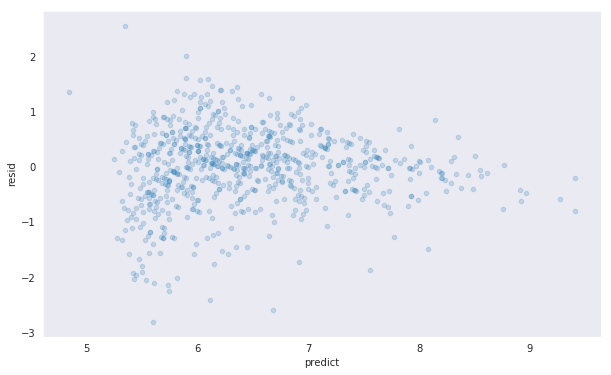

In [121]:
MovieDataSet4['predict']=fit1.predict(X)
MovieDataSet4['resid']=y-MovieDataSet4['predict']
with sns.axes_style('dark'):
    plot=MovieDataSet4.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

In [122]:
MovieDataSet4['predict']=fit1.predict(X)
MovieDataSet4['resid']=y-MovieDataSet4['predict']

In [123]:
MovieDataSet4.sort_values(by=['resid'],ascending=False)

,imdbRating,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Runtime,Year,imdbVotes,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Rating[T.Unrated],predict,resid
65,7.9,11927300,1506,1189975,1506,76.0,1993,36838,1.0,1.0,0.0,0.0,0.0,5.344524,2.555476
454,7.9,39418400,3702,11001961,3702,103.0,2017,41300,1.0,1.0,0.0,0.0,0.0,5.894430,2.005570
466,7.5,117431700,0,0,0,102.0,1964,22643,1.0,1.0,0.0,0.0,0.0,5.895674,1.604326
420,7.7,58076300,2084,5010109,2075,85.0,1992,42177,1.0,0.0,0.0,0.0,0.0,6.098900,1.601100
606,7.6,183146400,2812,30716131,2812,113.0,1996,108417,1.0,0.0,1.0,0.0,0.0,6.021549,1.578451
149,7.6,24534100,1391,4424535,1387,81.0,1992,148545,1.0,0.0,0.0,1.0,0.0,6.133828,1.466172
138,7.8,80400,70,45480,70,95.0,2017,1648,1.0,0.0,0.0,0.0,0.0,6.355032,1.444968
425,7.6,172140500,1969,9331746,1576,84.0,1988,133509,1.0,0.0,1.0,0.0,0.0,6.201030,1.398970
683,7.6,155671800,1950,11750203,1744,97.0,1989,131738,1.0,0.0,1.0,0.0,0.0,6.211726,1.388274
604,7.7,237007300,1621,14347221,1621,112.0,1982,103068,1.0,1.0,0.0,0.0,0.0,6.316187,1.383813


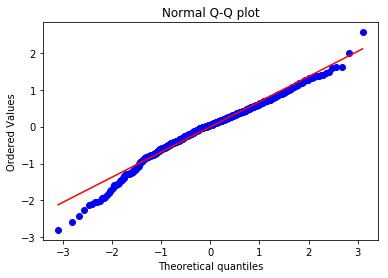

In [124]:
import scipy.stats as stats

stats.probplot(MovieDataSet4['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [125]:
MovieDataSet4.sort_values(by=['predict'],ascending=False)

,imdbRating,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Runtime,Year,imdbVotes,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Rating[T.Unrated],predict,resid
197,9.2,694447900,0,302393,6,175.0,1972,1397893,1.0,0.0,0.0,1.0,0.0,9.406725,-0.206725
216,8.6,274218500,1642,13766814,1497,118.0,1991,1094336,1.0,0.0,0.0,1.0,0.0,9.401600,-0.801600
385,8.7,298064500,2903,27788331,2849,136.0,1999,1461604,1.0,0.0,0.0,1.0,0.0,9.273981,-0.573981
43,8.5,521417300,1550,11152500,1420,111.0,1985,904793,1.0,1.0,0.0,0.0,0.0,8.967500,-0.467500
63,8.3,282868200,3858,48745440,3858,140.0,2005,1164146,1.0,0.0,1.0,0.0,0.0,8.919798,-0.619798
9,8.5,277722500,757,3527881,91,117.0,1979,691126,1.0,0.0,0.0,1.0,0.0,8.908914,-0.408914
360,8.8,480967900,3381,47211490,3359,178.0,2001,1466530,1.0,0.0,1.0,0.0,0.0,8.766553,0.033447
642,8.0,100224400,1112,4020663,1005,107.0,1984,709712,1.0,0.0,0.0,1.0,0.0,8.753725,-0.753725
272,8.5,682021500,1078,8305823,1078,115.0,1981,786720,1.0,1.0,0.0,0.0,0.0,8.607587,-0.107587
59,8.4,508447300,4404,160887295,4404,165.0,2012,1352041,1.0,0.0,1.0,0.0,0.0,8.556456,-0.156456


In [126]:
MovieDataSet4.head()

,imdbRating,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Runtime,Year,imdbVotes,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Rating[T.Unrated],predict,resid
0,5.2,61704300,1954,5888920,1912,85.0,1992,18251,1.0,1.0,0.0,0.0,0.0,5.381680,-0.181680
1,4.4,24924400,2043,3556310,2038,94.0,1994,7636,1.0,1.0,0.0,0.0,0.0,5.365587,-0.965587
2,4.2,839300,52,67789,52,87.0,1995,4825,1.0,0.0,1.0,0.0,0.0,5.598478,-1.398478
3,2.8,707500,120,150127,120,93.0,1998,9662,1.0,1.0,0.0,0.0,0.0,5.598061,-2.798061
4,7.7,270309600,3280,70885301,3103,117.0,2006,677971,1.0,0.0,0.0,1.0,0.0,7.917021,-0.217021


In [127]:
MovieDataSet4.sort_values(by=['resid'],ascending=False)

,imdbRating,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Runtime,Year,imdbVotes,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Rating[T.Unrated],predict,resid
65,7.9,11927300,1506,1189975,1506,76.0,1993,36838,1.0,1.0,0.0,0.0,0.0,5.344524,2.555476
454,7.9,39418400,3702,11001961,3702,103.0,2017,41300,1.0,1.0,0.0,0.0,0.0,5.894430,2.005570
466,7.5,117431700,0,0,0,102.0,1964,22643,1.0,1.0,0.0,0.0,0.0,5.895674,1.604326
420,7.7,58076300,2084,5010109,2075,85.0,1992,42177,1.0,0.0,0.0,0.0,0.0,6.098900,1.601100
606,7.6,183146400,2812,30716131,2812,113.0,1996,108417,1.0,0.0,1.0,0.0,0.0,6.021549,1.578451
149,7.6,24534100,1391,4424535,1387,81.0,1992,148545,1.0,0.0,0.0,1.0,0.0,6.133828,1.466172
138,7.8,80400,70,45480,70,95.0,2017,1648,1.0,0.0,0.0,0.0,0.0,6.355032,1.444968
425,7.6,172140500,1969,9331746,1576,84.0,1988,133509,1.0,0.0,1.0,0.0,0.0,6.201030,1.398970
683,7.6,155671800,1950,11750203,1744,97.0,1989,131738,1.0,0.0,1.0,0.0,0.0,6.211726,1.388274
604,7.7,237007300,1621,14347221,1621,112.0,1982,103068,1.0,1.0,0.0,0.0,0.0,6.316187,1.383813


In [128]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(MovieDataSet4["imdbRating"], MovieDataSet4['predict']))

In [129]:
rms

0.686234400501479

In [130]:
MovieDataSetG=MovieDataSetF

In [131]:
MovieDataSetG

,Movie_Title,Studio_x,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Domestic_Gross,Rating,Release_Date,Runtime,Actors,Awards,Director,Genre,Production,Year,imdbRating,imdbVotes
0,3 Ninjas,BV,61704300,1954,5888920,1912,29000301,PG,1992-08-07,85.0,"Victor Wong, Michael Treanor, Max Elliott Slad...",1 nomination.,Jon Turteltaub,"Action, Comedy, Family",Buena Vista,1992,5.2,18251
1,3 Ninjas Kick Back,TriS,24924400,2043,3556310,2038,11798854,PG,1994-05-06,94.0,"Victor Wong, Max Elliott Slade, Sean Fox, J. E...",3 nominations.,Charles T. Kanganis,"Family, Comedy, Action",Sony,1994,4.4,7636
2,3 Ninjas Knuckle Up,Sony,839300,52,67789,52,413479,PG-13,1995-03-10,87.0,"Victor Wong, Charles Napier, Michael Treanor, ...",2 nominations.,Sang-ok Shin,"Comedy, Action, Family",Sony,1995,4.2,4825
3,3 Ninjas: High Noon at Mega Mountain,Sony,707500,120,150127,120,375805,PG,1998-04-10,93.0,"Hulk Hogan, Loni Anderson, Jim Varney, Mathew ...",2 nominations.,Sean McNamara,"Action, Adventure, Comedy, Family",Sony,1998,2.8,9662
4,300,WB,270309600,3280,70885301,3103,210614939,R,2007-03-09,117.0,"Gerard Butler, Lena Headey, Dominic West, Davi...",17 wins & 45 nominations.,Zack Snyder,"Action, Fantasy",Warner Bros. Pictures,2006,7.7,677971
5,Kiss the Girls,Par.,116440300,2406,13215167,2271,60527873,R,1997-10-03,117.0,"Morgan Freeman, Ashley Judd, Cary Elwes, Alex ...",5 nominations.,Gary Fleder,"Crime, Drama, Mystery, Thriller",Paramount Pictures,1997,6.6,57986
6,Along Came a Spider,Par.,115567200,2573,16712407,2530,74078174,R,2001-04-06,103.0,"Morgan Freeman, Monica Potter, Michael Wincott...",1 win & 1 nomination.,Lee Tamahori,"Drama, Thriller",Paramount Pictures,2001,6.3,67124
7,Alex Cross,LG/S,28397800,2541,11396768,2539,25888412,PG-13,2012-10-19,101.0,"Tyler Perry, Edward Burns, Matthew Fox, Jean Reno",4 nominations.,Rob Cohen,"Action, Crime, Mystery, Thriller",Summit,2012,5.1,30638
8,Alice Through the Looking Glass,BV,77969900,3763,26858726,3763,77041381,PG,2016-05-27,112.0,"Johnny Depp, Mia Wasikowska, Helena Bonham Car...",2 wins & 18 nominations.,James Bobin,"Adventure, Family, Fantasy",Walt Disney Pictures,2016,6.2,75557
9,Alien,Fox,277722500,757,3527881,91,78944891,R,1979-05-25,117.0,"Tom Skerritt, Sigourney Weaver, Veronica Cartw...",Won 1 Oscar. Another 16 wins & 19 nominations.,Ridley Scott,"Horror, Sci-Fi",20th,1979,8.5,691126


In [132]:
MovieDataSetG['predict']=fit1.predict(X)
#MovieDataSetG['predict']=fit1.predict(X)
MovieDataSetG['resid']=y-MovieDataSet4['predict']

In [133]:
MovieDataSetG.sort_values(by=['resid'],ascending=False)

,Movie_Title,Studio_x,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Domestic_Gross,Rating,Release_Date,Runtime,Actors,Awards,Director,Genre,Production,Year,imdbRating,imdbVotes,predict,resid
65,Batman: Mask of the Phantasm,WB,11927300,1506,1189975,1506,5617391,PG,1993-12-25,76.0,"Kevin Conroy, Dana Delany, Hart Bochner, Stacy...",1 nomination.,"Eric Radomski, Bruce Timm, Kevin Altieri, Boyd...","Animation, Action, Adventure, Crime, Drama, Fa...",Warner Bros. Pictures,1993,7.9,36838,5.344524,2.555476
454,Paddington 2,WB,39418400,3702,11001961,3702,40891591,PG,2018-01-12,103.0,"Michael Gambon, Imelda Staunton, Ben Whishaw, ...",Nominated for 3 BAFTA Film Awards. Another 3 w...,Paul King,"Adventure, Comedy, Family, Fantasy",N/A,2017,7.9,41300,5.894430,2.005570
466,A Shot in the Dark,UA,117431700,0,0,0,12368234,PG,1964-06-23,102.0,"Peter Sellers, Elke Sommer, George Sanders, He...",Nominated for 1 BAFTA Film Award. Another 2 no...,Blake Edwards,"Comedy, Mystery",MGM,1964,7.5,22643,5.895674,1.604326
420,The Muppet Christmas Carol,BV,58076300,2084,5010109,2075,27281507,G,1992-12-11,85.0,"Michael Caine, Dave Goelz, Steve Whitmire, Jer...",1 win & 1 nomination.,Brian Henson,"Comedy, Drama, Family, Fantasy, Musical",Walt Disney Pictures,1992,7.7,42177,6.098900,1.601100
606,Star Trek: First Contact,Par.,183146400,2812,30716131,2812,92027888,PG-13,1996-11-22,113.0,"Patrick Stewart, Jonathan Frakes, Brent Spiner...",Nominated for 1 Oscar. Another 8 wins & 20 nom...,Jonathan Frakes,"Action, Adventure, Drama, Sci-Fi, Thriller",Paramount Pictures,1996,7.6,108417,6.021549,1.578451
149,Army of Darkness,Uni.,24534100,1391,4424535,1387,11502976,R,1993-02-19,81.0,"Bruce Campbell, Embeth Davidtz, Marcus Gilbert...",10 wins & 7 nominations.,Sam Raimi,"Comedy, Horror",Universal Pictures,1992,7.6,148545,6.133828,1.466172
138,Earth: One Amazing Day,BBC,80400,70,45480,70,81345,G,2017-10-06,95.0,"Robert Redford, Jackie Chan",2 nominations.,"Richard Dale, Lixin Fan, Peter Webber","Documentary, Family",Earth Film Productions,2017,7.8,1648,6.355032,1.444968
425,The Naked Gun: From the Files of Police Squad!,Par.,172140500,1969,9331746,1576,78756177,PG-13,1988-12-02,84.0,"Leslie Nielsen, Priscilla Presley, Ricardo Mon...",1 nomination.,David Zucker,"Comedy, Crime",Paramount Pictures,1988,7.6,133509,6.201030,1.398970
683,Christmas Vacation,WB,155671800,1950,11750203,1744,71319526,PG-13,1989-12-01,97.0,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",N/A,Jeremiah S. Chechik,Comedy,Warner Bros. Pictures,1989,7.6,131738,6.211726,1.388274
604,Star Trek II: The Wrath of Khan,Par.,237007300,1621,14347221,1621,78912963,PG,1982-06-04,112.0,"William Shatner, Leonard Nimoy, DeForest Kelle...",3 wins & 9 nominations.,Nicholas Meyer,"Action, Adventure, Sci-Fi",Paramount Pictures,1982,7.7,103068,6.316187,1.383813


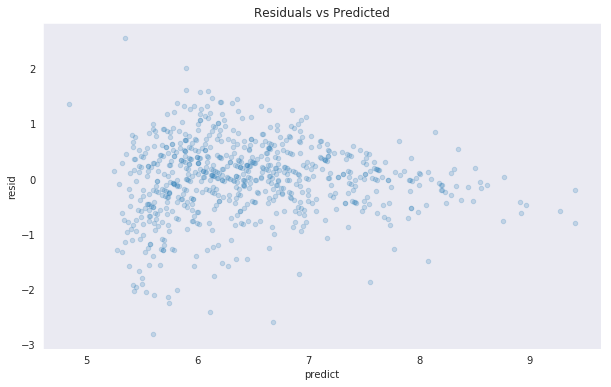

In [134]:
MovieDataSet4['predict']=fit1.predict(X)
MovieDataSet4['resid']=y-MovieDataSet4['predict']
with sns.axes_style('dark'):
    plot=MovieDataSet4.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.2,figsize=(10,6))

import matplotlib.pyplot as plt

plt.title('Residuals vs Predicted')
plt.show()

In [135]:
MovieSetH = MovieDataSetG['Movie_Title']

In [136]:
MovieSetH['predict']=MovieDataSetG['predict']

/Users/ginachung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
MovieSetH['resid']=MovieDataSetG['resid']

In [138]:
pd.DataFrame(MovieSetH)

,Movie_Title
0,3 Ninjas
1,3 Ninjas Kick Back
2,3 Ninjas Knuckle Up
3,3 Ninjas: High Noon at Mega Mountain
4,300
5,Kiss the Girls
6,Along Came a Spider
7,Alex Cross
8,Alice Through the Looking Glass
9,Alien


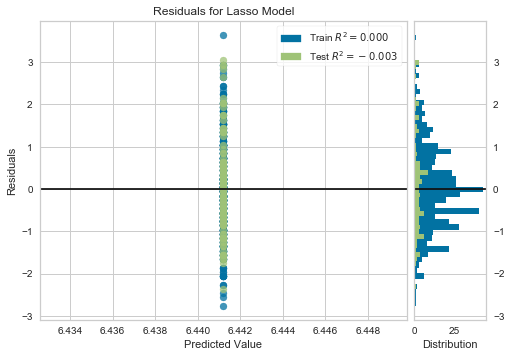

In [139]:
# Instantiate the linear model and visualizer

from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot
ridge = Lasso()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the model
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [141]:
MovieDataSetG.sort_values(by=['predict'],ascending=False)

,Movie_Title,Studio_x,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Domestic_Gross,Rating,Release_Date,Runtime,Actors,Awards,Director,Genre,Production,Year,imdbRating,imdbVotes,predict,resid
197,The Godfather,Par.,694447900,0,302393,6,133698921,R,1972-03-15,175.0,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 24 wins & 28 nominations.,Francis Ford Coppola,"Crime, Drama",Paramount Pictures,1972,9.2,1397893,9.406725,-0.206725
216,The Silence of the Lambs,Orion,274218500,1642,13766814,1497,130742922,R,1991-02-14,118.0,"Jodie Foster, Lawrence A. Bonney, Kasi Lemmons...",Won 5 Oscars. Another 54 wins & 44 nominations.,Jonathan Demme,"Crime, Drama, Thriller",Orion Pictures Corporation,1991,8.6,1094336,9.401600,-0.801600
385,The Matrix,WB,298064500,2903,27788331,2849,171479930,R,1999-03-31,136.0,"Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",Won 4 Oscars. Another 34 wins & 48 nominations.,"Lana Wachowski, Lilly Wachowski","Action, Sci-Fi",Warner Bros. Pictures,1999,8.7,1461604,9.273981,-0.573981
43,Back to the Future,Uni.,521417300,1550,11152500,1420,210609762,PG,1985-07-03,111.0,"Michael J. Fox, Christopher Lloyd, Lea Thompso...",Won 1 Oscar. Another 19 wins & 25 nominations.,Robert Zemeckis,"Adventure, Comedy, Sci-Fi",Universal Pictures,1985,8.5,904793,8.967500,-0.467500
63,Batman Begins,WB,282868200,3858,48745440,3858,205343774,PG-13,2005-06-15,140.0,"Christian Bale, Michael Caine, Liam Neeson, Ka...",Nominated for 1 Oscar. Another 14 wins & 72 no...,Christopher Nolan,"Action, Adventure, Thriller",Warner Bros. Pictures,2005,8.3,1164146,8.919798,-0.619798
9,Alien,Fox,277722500,757,3527881,91,78944891,R,1979-05-25,117.0,"Tom Skerritt, Sigourney Weaver, Veronica Cartw...",Won 1 Oscar. Another 16 wins & 19 nominations.,Ridley Scott,"Horror, Sci-Fi",20th,1979,8.5,691126,8.908914,-0.408914
360,The Lord of the Rings: The Fellowship of the Ring,NL,480967900,3381,47211490,3359,313364114,PG-13,2001-12-19,178.0,"Alan Howard, Noel Appleby, Sean Astin, Sala Baker",Won 4 Oscars. Another 113 wins & 123 nominations.,Peter Jackson,"Adventure, Drama, Fantasy",New Line Cinema,2001,8.8,1466530,8.766553,0.033447
642,The Terminator,Orion,100224400,1112,4020663,1005,38371200,R,1984-10-26,107.0,"Arnold Schwarzenegger, Michael Biehn, Linda Ha...",6 wins & 6 nominations.,James Cameron,"Action, Sci-Fi",Orion Pictures Corporation,1984,8.0,709712,8.753725,-0.753725
272,Raiders of the Lost Ark,Par.,682021500,1078,8305823,1078,212222025,PG,1981-06-12,115.0,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,Steven Spielberg,"Action, Adventure",Paramount Pictures,1981,8.5,786720,8.607587,-0.107587
59,The Dark Knight Rises,WB,508447300,4404,160887295,4404,448139099,PG-13,2012-07-20,165.0,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",Nominated for 1 BAFTA Film Award. Another 38 w...,Christopher Nolan,"Action, Thriller",Warner Bros. Pictures,2012,8.4,1352041,8.556456,-0.156456


In [150]:
mask = (MovieDataSetG['resid']>0)
MovieDataA = MovieDataSetG[mask].sort_values(by=['resid'],ascending=True)

In [162]:
MovieDataA["imdbVotes"].sum()

74376155

In [155]:
MovieDataA

,Movie_Title,Studio_x,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Domestic_Gross,Rating,Release_Date,Runtime,Actors,Awards,Director,Genre,Production,Year,imdbRating,imdbVotes,predict,resid
134,Maleficent,BV,257431200,3948,69431298,3948,241410378,PG,2014-05-30,97.0,"Angelina Jolie, Elle Fanning, Sharlto Copley, ...",Nominated for 1 Oscar. Another 10 wins & 42 no...,Robert Stromberg,"Action, Adventure, Family, Fantasy, Romance",Walt Disney Pictures,2014,7.0,297570,6.999587,0.000413
522,Return of the Living Dead III,Trim.,115600,9,14810,9,54207,R,1993-10-29,96.0,"Kent McCord, James T. Callahan, Sarah Douglas,...",3 wins.,Brian Yuzna,Horror,Trimark,1993,5.9,12023,5.896490,0.003510
23,American Wedding,Uni.,153119400,3175,33369440,3172,104565114,R,2003-08-01,102.0,"Jason Biggs, Seann William Scott, Alyson Hanni...",3 wins & 6 nominations.,Jesse Dylan,Comedy,Universal Pictures,2003,6.3,179707,6.294254,0.005746
535,Inferno,Sony,34499000,3576,14860425,3576,34343574,PG-13,2016-10-28,121.0,"Tom Hanks, Felicity Jones, Omar Sy, Irrfan Khan",1 win & 1 nomination.,Ron Howard,"Action, Adventure, Crime, Drama, Mystery, Thri...",Sony,2016,6.2,132674,6.188915,0.011085
574,Shrek 2,DW,627379700,4223,108037878,4163,441226247,PG,2004-05-19,93.0,"Mike Myers, Eddie Murphy, Cameron Diaz, Julie ...",Nominated for 2 Oscars. Another 18 wins & 50 n...,"Andrew Adamson, Kelly Asbury, Conrad Vernon","Animation, Adventure, Comedy, Family, Fantasy,...",Paramount Pictures,2004,7.2,370258,7.187439,0.012561
22,American Pie,Uni.,178270400,2544,18709680,2508,102561004,R,1999-07-09,95.0,"Jason Biggs, Jennifer Coolidge, Shannon Elizab...",9 wins & 14 nominations.,"Paul Weitz, Chris Weitz",Comedy,Universal Pictures,1999,7.0,345603,6.981208,0.018792
340,Kick-Ass 2,Uni.,32432200,2945,13332955,2940,28795985,R,2013-08-16,103.0,"Aaron Taylor-Johnson, Chloë Grace Moretz, Morr...",1 win & 7 nominations.,Jeff Wadlow,"Action, Comedy, Crime",Universal Pictures,2013,6.6,233150,6.577697,0.022303
133,Dhoom 2,Yash,3558900,63,979001,63,2643586,Unrated,2006-11-23,152.0,"Hrithik Roshan, Abhishek Bachchan, Aishwarya R...",3 wins & 14 nominations.,Sanjay Gadhvi,"Action, Crime, Thriller",Yash Raj Films,2006,6.5,20984,6.476954,0.023046
302,Diamonds Are Forever,UA,234501000,0,0,0,43819547,PG,1971-12-17,120.0,"Sean Connery, Jill St. John, Charles Gray, Lan...",Nominated for 1 Oscar. Another 2 wins & 3 nomi...,Guy Hamilton,"Action, Adventure, Thriller",20th,1971,6.7,84753,6.676940,0.023060
476,Pitch Perfect,Uni.,71310800,2787,5149433,335,65001093,PG-13,2012-09-28,112.0,"Anna Kendrick, Skylar Astin, Ben Platt, Britta...",7 wins & 20 nominations.,Jason Moore,"Comedy, Music, Romance",Universal Pictures,2012,7.2,249882,7.175818,0.024182


In [152]:
MovieDataA['imdbRating'].value_counts()

6.6    27
6.2    25
7.2    25
7.0    23
6.7    22
6.3    22
7.8    19
7.3    19
6.4    19
7.6    18
6.9    16
6.8    14
6.5    14
7.5    13
6.1    13
7.1    12
7.7    11
7.4     9
7.9     9
5.8     9
6.0     8
8.0     8
5.9     7
5.6     4
8.1     4
5.7     3
8.5     2
8.4     1
8.9     1
8.3     1
9.0     1
5.5     1
8.2     1
8.7     1
8.8     1
5.4     1
Name: imdbRating, dtype: int64

In [156]:
mask = (MovieDataSetG['resid']<0)
MovieDataB = MovieDataSetG[mask].sort_values(by=['resid'],ascending=False)

In [161]:
MovieDataB["imdbVotes"].sum()

72990484

In [159]:
MovieDataB

,Movie_Title,Studio_x,Adjusted_Gross,Gross_Theatres,Opening_Dollar_Amt,Opening_Theatres,Domestic_Gross,Rating,Release_Date,Runtime,Actors,Awards,Director,Genre,Production,Year,imdbRating,imdbVotes,predict,resid
339,Kick-Ass,LGF,53868200,3065,19828687,3065,48071303,R,2010-04-16,117.0,"Aaron Taylor-Johnson, Garrett M. Brown, Evan P...",19 wins & 61 nominations.,Matthew Vaughn,"Action, Comedy",Lionsgate Films,2010,7.6,488235,7.600443,-0.000443
244,Home Alone,Fox,598093000,2173,17081997,1202,285761243,PG,1990-11-16,105.0,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",Nominated for 2 Oscars. Another 10 wins & 4 no...,Chris Columbus,"Comedy, Family",20th,1990,7.5,393574,7.502790,-0.002790
177,Final Destination 5,WB (NL),47363500,3155,18031396,3155,42587643,R,2011-08-12,95.0,"Nicholas D'Agosto, Emma Bell, Miles Fisher, El...",2 wins & 6 nominations.,Steven Quale,"Horror, Thriller",Warner Bros. Pictures,2011,5.9,95843,5.902840,-0.002840
409,"Monsters, Inc.",BV,398128000,3649,62577067,3237,255873250,G,2001-11-02,90.0,"John Goodman, Billy Crystal, Mary Gibbs, Steve...",Won 1 Oscar. Another 13 wins & 38 nominations.,"Pete Docter, David Silverman(co-director), Lee...","Animation, Adventure, Comedy, Family, Fantasy",Buena Vista Distribution Compa,2001,8.1,718325,8.107638,-0.007638
228,Harry Potter and the Prisoner of Azkaban,WB,354822500,3855,93687367,3855,249541069,PG,2004-06-04,142.0,"Daniel Radcliffe, Richard Griffiths, Pam Ferri...",Nominated for 2 Oscars. Another 14 wins & 45 n...,Alfonso Cuarón,"Adventure, Family, Fantasy, Mystery",Warner Bros. Pictures,2004,7.9,475555,7.908874,-0.008874
512,Rambo: First Blood Part II,TriS,374131900,2074,20176217,2074,150415432,R,1985-05-22,94.0,"Sylvester Stallone, Richard Crenna, Charles Na...",Nominated for 1 Oscar. Another 5 wins & 4 nomi...,George P. Cosmatos,"Action, Adventure, Thriller, War",TriStar Pictures,1985,6.4,134558,6.408951,-0.008951
344,Kingsman: The Golden Circle,Fox,97751600,4038,39023010,4003,100234838,R,2017-09-22,141.0,"Taron Egerton, Edward Holcroft, Gordon Alexand...",1 win & 4 nominations.,Matthew Vaughn,"Action, Adventure, Comedy",20th,2017,6.8,215822,6.810984,-0.010984
590,The Smurfs and the Magic Flute,Atl,30183000,432,1180582,183,11234220,G,1983-10-07,89.0,"Georges Atlas, Jacques Balutin, Angelo Bardi, ...",N/A,Peyo,"Animation, Comedy, Family",N/A,1976,6.1,1012,6.111070,-0.011070
367,Madagascar,DW,266684600,4142,47224594,4131,193595521,PG,2005-05-27,86.0,"Ben Stiller, Chris Rock, David Schwimmer, Jada...",4 wins & 31 nominations.,"Eric Darnell, Tom McGrath","Animation, Adventure, Comedy, Family",Paramount Pictures,2005,6.9,318363,6.914719,-0.014719
712,X-Men: First Class,Fox,160572300,3692,55101604,3641,146408305,PG-13,2011-06-03,131.0,"James McAvoy, Laurence Belcher, Michael Fassbe...",20 wins & 38 nominations.,Matthew Vaughn,"Action, Adventure, Sci-Fi",20th,2011,7.7,595319,7.716083,-0.016083


In [158]:
MovieDataB["imdbRating"].mean()

5.9138138138138165

In [154]:
MovieDataB['imdbRating'].value_counts()

5.7    16
5.4    15
6.3    14
5.2    13
6.5    13
5.5    13
5.1    12
5.9    12
6.6    11
5.6    11
4.9    10
6.4    10
6.1    10
5.8     9
4.4     9
7.0     9
6.0     8
6.2     8
5.0     7
6.9     7
4.5     6
4.7     6
8.0     6
6.7     6
4.6     6
4.8     6
3.5     5
8.1     5
6.8     5
7.4     5
5.3     5
7.3     4
7.6     4
7.2     4
7.1     4
7.9     4
8.5     4
4.0     3
7.7     3
3.8     3
4.2     3
8.3     2
3.7     2
3.6     2
4.1     2
4.3     2
7.8     1
8.6     1
3.4     1
8.4     1
8.2     1
9.2     1
8.7     1
2.8     1
7.5     1
Name: imdbRating, dtype: int64